# Random Forest Classifier

In [16]:
import pandas as pd
import numpy as np

freq = 'Daily'
stock = 'AAPL'
price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
y = price.direction.shift(-1).values[:-1]
predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv',index_col='Date')
predictors.fillna(0,inplace=True)
X = predictors.values[:-1,]
y.shape


(2536,)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn
print(sklearn.__version__)
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

1.2.2


In [9]:
from matplotlib import pyplot as plt

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
X_res,y_res = sm.fit_resample(X_train,y_train)
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(criterion='log_loss'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.83      0.60       354
         1.0       0.56      0.19      0.28       407

    accuracy                           0.49       761
   macro avg       0.52      0.51      0.44       761
weighted avg       0.52      0.49      0.43       761



In [11]:
model = XGBClassifier(base_score=0.5, booster='gbtree',objective='binary:logistic', learning_rate=0.1, max_depth=5,n_estimators=1000)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.79      0.59       354
         1.0       0.54      0.22      0.31       407

    accuracy                           0.48       761
   macro avg       0.50      0.50      0.45       761
weighted avg       0.51      0.48      0.44       761



[0.02732848 0.02473569 0.02669858 0.03161255 0.02487596 0.02582537
 0.02735763 0.03209236 0.025414   0.02847549 0.02551679 0.02749804
 0.02688657 0.02396409 0.02882453 0.03325201 0.02868698 0.03117313
 0.03614888 0.03474942 0.02846034 0.02966072 0.02818541 0.02658232
 0.02482181 0.0335486  0.03647583 0.02347166 0.02824873 0.01571124
 0.02663201 0.02513322 0.02668167 0.02813925 0.02367407 0.02345658]


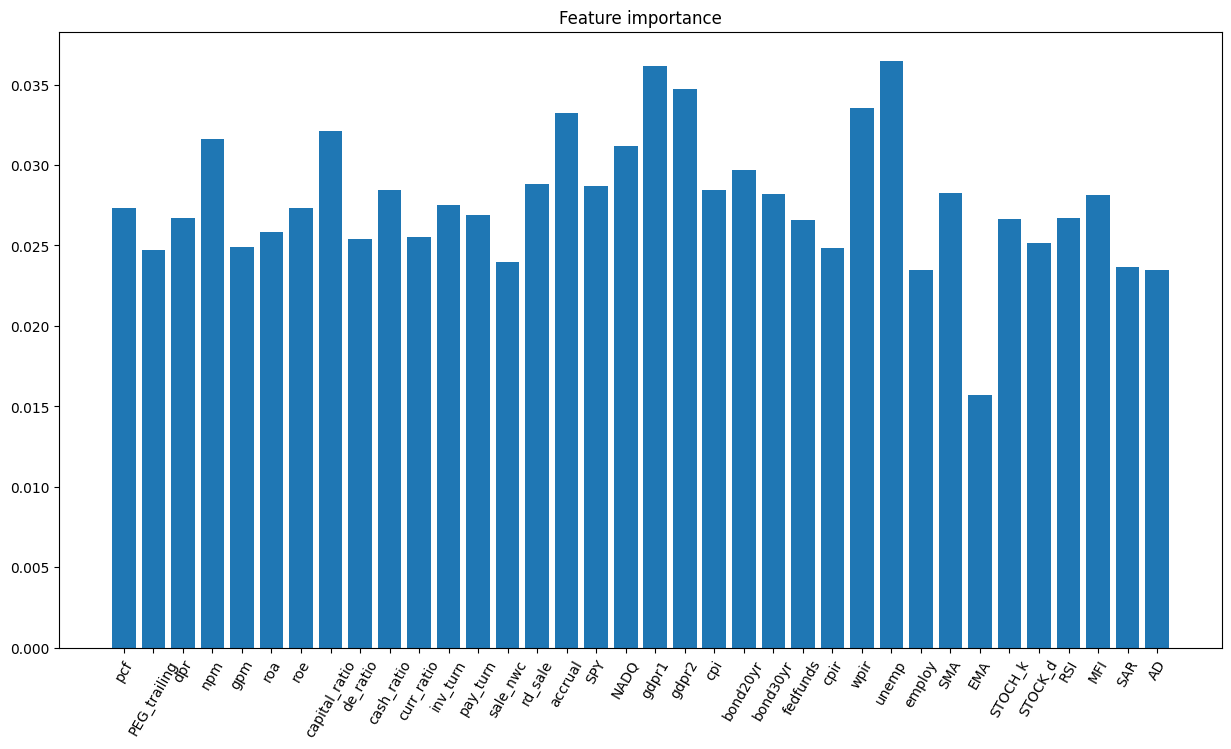

In [12]:
print(model.feature_importances_)
plt.figure(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title('Feature importance')
plt.xticks(range(len(model.feature_importances_)),predictors.columns,rotation=60)
plt.show()

In [13]:
important_features = predictors.columns[np.where(model.feature_importances_>0.02)]

In [19]:
X_se = predictors[important_features].values[:-1,]
print(X_se.shape)
X_train,X_test,y_train,y_test = train_test_split(X_se,y,test_size=0.3,shuffle=False)
sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
X_res,y_res = sm.fit_resample(X_train,y_train)
model = XGBClassifier(base_score=0.5, booster='gbtree',objective='binary:logistic', learning_rate=0.1, max_depth=3,n_estimators=500)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

(2536, 35)
              precision    recall  f1-score   support

         0.0       0.47      0.81      0.60       354
         1.0       0.56      0.21      0.30       407

    accuracy                           0.49       761
   macro avg       0.52      0.51      0.45       761
weighted avg       0.52      0.49      0.44       761



In [20]:
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(criterion='log_loss'))
pipe.fit(X_res,y_res)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.94      0.62       354
         1.0       0.54      0.07      0.12       407

    accuracy                           0.47       761
   macro avg       0.50      0.50      0.37       761
weighted avg       0.51      0.47      0.35       761



In [21]:
dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical = True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)
num_parallel_tree = 4
num_boost_round = 16
# total number of built trees is num_parallel_tree * num_classes * num_boost_round

# We build a boosted random forest for classification here.
booster = xgb.train({
    'num_parallel_tree': 4, 'subsample': 0.5, 'num_class': 2},
                    num_boost_round=num_boost_round, dtrain=dtrain)
    


#